# Linear Regression

## Bài toán
Có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như dưới đây:

![m](https://raw.githubusercontent.com/UocNTh/Machine-Learning/main/Image/Screenshot%202023-11-20%20205812.png?token=GHSAT0AAAAAACKPSNP7E4VMFA4LN3Y5RDX6ZK3PI7A)

Bài toán đặt ra là: liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? 

Chúng ta có thể thấy là cân nặng sẽ tỉ lệ thuận với chiều cao (càng cao càng nặng), nên có thể sử dụng Linear Regression model cho việc dự đoán này. Để kiểm tra độ chính xác của model tìm được, chúng ta sẽ giữ lại cột 155 và 160 cm để kiểm thử, các cột còn lại được sử dụng để huấn luyện (train) model.

## Hiển thị dữ liệu trên đồ thị


Sử dụng hai thư viện 
- numpy cho đại số tuyến tính
- matplotlib cho việc vẽ hình 

Cài đặt: 

    pip install numpy 
    pip install matplotlib

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

Bài toán có x : chiều cao (height - cm), y : cân nặng (weight - kg)

In [2]:
# .T ở cuối mỗi mảng cho biết rằng mẳng này sẽ được chuyển vị
# tạo thành các vector cột
# X: height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# y: weight (kg) 
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

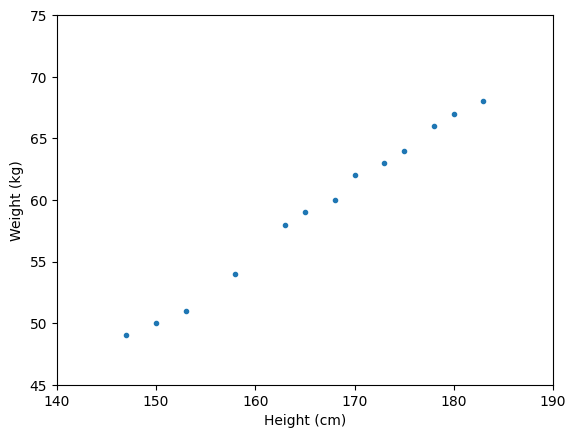

In [3]:
plt.plot(X,y, '.')
plt.axis([140,190,45,75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show() 

Note: Đường thẳng mô tả mối quan hệ giữa đầu vào và đầu ra. Từ đồ thị ta có thể thấy, dữ liệu được sắp xếp gần như theo 1 đường thẳng, vì vậy trong trường hợp này mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt nhất 
 
 height = w_1*weight + w_0



## Nghiệm theo công thức 


Tính toán các hệ số w_1 và w_0 dựa vào công thức. Chú ý: giả nghịch đảo của một ma trận A trong Python sẽ được tính bằng numpy.linalg.pinv(A), pinv là từ viết tắt của pseudo inverse.

![m](https://raw.githubusercontent.com/UocNTh/Machine-Learning/main/Image/Screenshot%202023-11-20%20215140.png?token=GHSAT0AAAAAACKPSNP7UXUIBQCBNKDNFLQ2ZK3PKAQ)

In [4]:
# Xây dựng XBar

# Lý do tại sao phải xây dựng ma trận Xbar
# Trong hồi quy tuyến tính, một đường thích nghi
# được mô tả bởi phương trình
# y = w_0 + w_1*x
# Ma trận XBar được sử dụng để tính toán 
# các trọng số w_0 và w_1 

#one là ma trận chỉ chứa giá trị 1 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one,X), axis = 1 ) 
print(Xbar)

# Tính toán trọng số 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
# w là ma trận có n hàng và 1 cột 
w = np.dot(np.linalg.pinv(A), b)  # w.shape --> (2,1)

# Chuẩn bị vẽ đường đường thích nghi 
w_0 = w[0][0]
w_1 = w[1][0]
# Tạo ra một mảng gồm 2 giá trị 145 và 185
x0 = np.linspace(145, 185, 2) 
y0 = w_0 + w_1*x0

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


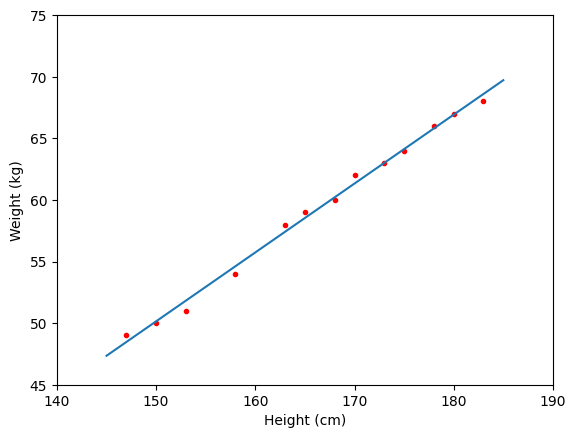

In [5]:
plt.plot(X, y, 'r.')     # data
plt.plot(x0, y0)               # nối đường thẳng sau khi có x0, y0
plt.axis([140, 190, 45, 75]) # bảng kéo từ trục hoành 140-190 và trục tung 45-75
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [6]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )


Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


## Nghiệm theo thư viện scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(Xbar,y)

# coefficient: hệ số ước lượng nên hàm regr.coef sẽ tính ra kết quả của công thức linear regr.
print( 'Solution found by scikit-learn  : ', model.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
